<a href="https://colab.research.google.com/github/mabdulrehman8833-cloud/Personal-Projects/blob/main/Data%20Exploration/Exercise%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply the transformation steps specified below to the Ames housing dataset.

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

sns.set_theme(palette="Set2")

# Load the data

In [62]:
df = pd.read_csv("/content/ames_housing.csv")
df.head()

,MSZoning,LotArea,Street,Utilities,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea,YrSold,SalePrice
0,RL,8450.0,Pave,AllPub,5.0,2003.0,856.0,1710.0,2.0,1.0,3.0,1.0,8.0,548.0,61.0,0.0,0.0,2008.0,208500.0
1,RL,9600.0,Pave,AllPub,8.0,1976.0,1262.0,1262.0,2.0,0.0,3.0,1.0,6.0,460.0,0.0,0.0,0.0,2007.0,181500.0
2,RL,11250.0,Pave,AllPub,5.0,2001.0,920.0,1786.0,2.0,1.0,3.0,1.0,6.0,608.0,42.0,0.0,0.0,2008.0,223500.0
3,RL,9550.0,Pave,AllPub,5.0,1915.0,756.0,1717.0,1.0,0.0,3.0,1.0,NaN,642.0,35.0,272.0,0.0,2006.0,140000.0
4,RL,14260.0,NaN,NaN,5.0,2000.0,1145.0,2198.0,2.0,1.0,4.0,1.0,9.0,836.0,84.0,0.0,0.0,2008.0,250000.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1418 non-null   object 
 1   LotArea        1417 non-null   float64
 2   Street         1406 non-null   object 
 3   Utilities      1414 non-null   object 
 4   OverallCond    1417 non-null   float64
 5   YearBuilt      1418 non-null   float64
 6   TotalBsmtSF    1417 non-null   float64
 7   GrLivArea      1412 non-null   float64
 8   FullBath       1411 non-null   float64
 9   HalfBath       1414 non-null   float64
 10  BedroomAbvGr   1405 non-null   float64
 11  KitchenAbvGr   1418 non-null   float64
 12  TotRmsAbvGrd   1423 non-null   float64
 13  GarageArea     1410 non-null   float64
 14  OpenPorchSF    1426 non-null   float64
 15  EnclosedPorch  1409 non-null   float64
 16  PoolArea       1421 non-null   float64
 17  YrSold         1422 non-null   float64
 18  SalePric

# Train-test split

Split the data into the training and test parts, reproducing the split used in the previous exercise.

In [64]:
#split data
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)

# Feature engineering

Create a feature representing the age of the house.

In [65]:
#create feature representing house age
trainset["HouseAge"] = trainset["YrSold"] - trainset["YearBuilt"]
testset["HouseAge"] = testset["YrSold"] - testset["YearBuilt"]

Delete the "Utilities" column.

In [66]:
#delete utilities column
trainset.drop("Utilities", axis=1, inplace=True)
testset.drop("Utilities", axis=1, inplace=True)

# Dummy variables

In [67]:
#dummy variables
trainset = pd.get_dummies(trainset, drop_first=True)
testset = pd.get_dummies(testset, drop_first=True)

In [68]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        282 non-null    float64
 1   OverallCond    284 non-null    float64
 2   YearBuilt      284 non-null    float64
 3   TotalBsmtSF    281 non-null    float64
 4   GrLivArea      279 non-null    float64
 5   FullBath       279 non-null    float64
 6   HalfBath       284 non-null    float64
 7   BedroomAbvGr   276 non-null    float64
 8   KitchenAbvGr   284 non-null    float64
 9   TotRmsAbvGrd   284 non-null    float64
 10  GarageArea     284 non-null    float64
 11  OpenPorchSF    284 non-null    float64
 12  EnclosedPorch  282 non-null    float64
 13  PoolArea       281 non-null    float64
 14  YrSold         282 non-null    float64
 15  SalePrice      278 non-null    float64
 16  HouseAge       274 non-null    float64
 17  MSZoning_FV    292 non-null    bool   
 18  MSZoning_RH  

In [69]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1135 non-null   float64
 1   OverallCond    1133 non-null   float64
 2   YearBuilt      1134 non-null   float64
 3   TotalBsmtSF    1136 non-null   float64
 4   GrLivArea      1133 non-null   float64
 5   FullBath       1132 non-null   float64
 6   HalfBath       1130 non-null   float64
 7   BedroomAbvGr   1129 non-null   float64
 8   KitchenAbvGr   1134 non-null   float64
 9   TotRmsAbvGrd   1139 non-null   float64
 10  GarageArea     1126 non-null   float64
 11  OpenPorchSF    1142 non-null   float64
 12  EnclosedPorch  1127 non-null   float64
 13  PoolArea       1140 non-null   float64
 14  YrSold         1140 non-null   float64
 15  SalePrice      1128 non-null   float64
 16  HouseAge       1106 non-null   float64
 17  MSZoning_FV    1168 non-null   bool   
 18  MSZoning_RH

# Missing values

Use IterativeImputer to impute missing values in the data.

In [70]:
#use iterativeimputer to impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Log transformation

Apply log transformation to LotArea, TotalBmstSF, GrLivArea, OpenPorchSF.

array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'OpenPorchSF'}>]], dtype=object)

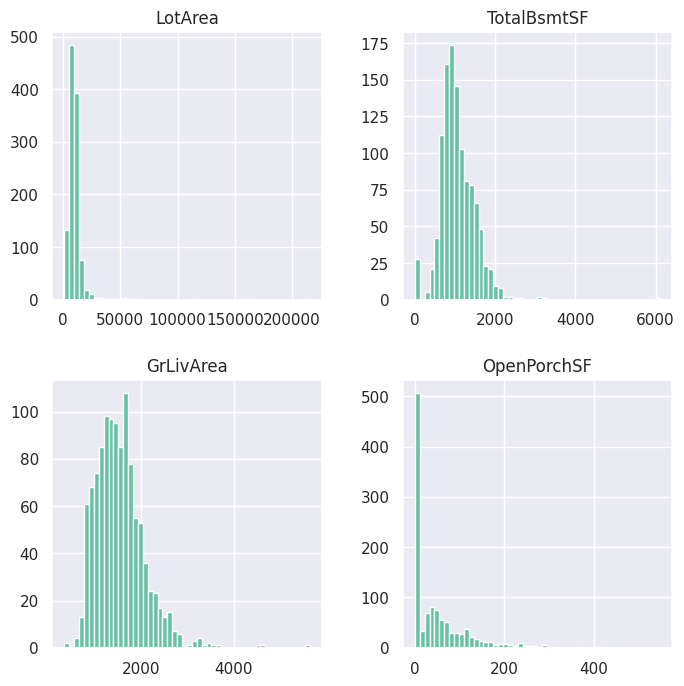

In [71]:
trainset[["LotArea", "TotalBsmtSF", "GrLivArea", "OpenPorchSF"]].hist(bins=50, figsize=(8,8))


# Outlier detection

Use the Isolation Forest method to remove 5% of the outliers.

In [72]:
# separate the target and predictors
ytrain = trainset["SalePrice"].copy()
Xtrain = trainset.drop("SalePrice", axis=1)
ytest = testset["SalePrice"].copy()
Xtest = testset.drop("SalePrice", axis=1)

In [73]:
# check the size of the Xtrain and Xtest datasets
Xtrain.shape, Xtest.shape

((1168, 21), (292, 21))

In [82]:
#use isolation forest method to remove 5% of outliers
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05)
iso.fit(Xtrain)

IsolationForest(contamination=0.05)

# Feature selection

Select 10 features with the greatest correlation with the target.

In [75]:
#select 10 features with greates correlation
corr_matrix = trainset.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
GrLivArea,0.695309
GarageArea,0.631503
TotalBsmtSF,0.598387
FullBath,0.557907
YearBuilt,0.522503
TotRmsAbvGrd,0.512131
OpenPorchSF,0.296621
HalfBath,0.276661
LotArea,0.260403


# Feature scaling

Use StandardScaler to scale all features.

In [79]:
#Use StandardScaler to scale all features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [81]:
print (Xtrain)
print (Xtest)

[[-0.21060693  0.37603799 -0.46482356 ...  0.54833215 -0.40845216
   0.21585871]
 [-0.26241564  1.26922675  0.71777379 ...  0.54833215 -0.40845216
   0.21585871]
 [-0.17591442  1.26922675 -2.00877011 ...  0.54833215 -0.40845216
   0.21585871]
 ...
 [-0.23158808  1.26922675 -0.53052342 ...  0.54833215 -0.40845216
   0.21585871]
 [-0.28036004  2.16241551 -1.7459707  ...  0.54833215 -0.40845216
   0.21585871]
 [-0.64458541 -0.51715078  1.17767277 ...  0.54833215 -0.40845216
   0.21585871]]
[[-0.20931861  2.16241551 -0.267724   ...  0.54833215 -0.40845216
   0.21585871]
 [ 0.14423214 -0.51715078  0.75062372 ...  0.54833215 -0.40845216
   0.21585871]
 [-0.15907428  0.37603799         nan ... -1.82371213  2.44826714
   0.21585871]
 ...
 [-0.22910347 -0.51715078  1.11197291 ...  0.54833215 -0.40845216
   0.21585871]
 [-0.14766348 -0.51715078 -1.02327232 ...  0.54833215 -0.40845216
   0.21585871]
 [-0.23637325  1.26922675 -0.03777452 ...  0.54833215 -0.40845216
   0.21585871]]
